## Dataset

This dataset concerns credit card applications. It has a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. General goal is to predict which people in the dataset are successful in applying for a credit card.

#### Attributes

-   Gender: 0=Female, 1=Male
-   Age: Age in years
-   Debt: Outstanding debt
-   Married: 0=Single/Divorced/etc, 1=Married
-   BankCustomer: 0=does not have a bank account, 1=has a bank account
-   Investment score: a number from 0 to 10
-   BankRecord
-   Industry: job sector of current or most recent job
-   Ethnicity
-   YearsEmployed
-   PriorDefault: 0=no prior defaults, 1=prior default
-   Employed: 0=not employed, 1=employed
-   CreditScore
-   DriversLicense: 0=no license, 1=has license
-   Citizenship: either ByBirth, ByOtherMeans or Temporary
-   ZipCode: 5 digit number
-   Income
-   Approved: 0=not approved, 1=approved

#### Import basic libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#### Read the data

In [57]:
df = pd.read_csv('credit_score_dataset.csv')

## 1. Data exploration

Let's take a closer look at the data.

In [58]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,InvestmentScore,BankRecord,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,3.65,1,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,1.94,1,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,8.15,1,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,7.99,1,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,2.37,1,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [59]:
df.shape

(690, 18)

In [60]:
df.dtypes

Gender               int64
Age                float64
Debt               float64
Married              int64
BankCustomer         int64
Industry            object
InvestmentScore    float64
BankRecord           int64
Ethnicity           object
YearsEmployed      float64
PriorDefault         int64
Employed             int64
CreditScore          int64
DriversLicense       int64
Citizen             object
ZipCode              int64
Income               int64
Approved             int64
dtype: object

In [61]:
df.nunique()

Gender               2
Age                350
Debt               215
Married              2
BankCustomer         2
Industry            14
InvestmentScore    491
BankRecord           2
Ethnicity            5
YearsEmployed      132
PriorDefault         2
Employed             2
CreditScore         23
DriversLicense       2
Citizen              3
ZipCode            170
Income             240
Approved             2
dtype: int64

In [62]:
print(len(df['Ethnicity'].unique()))

5


In [63]:
int(df['Age'].mean())

31

In [64]:
df.groupby('Gender')['Approved'].sum()/df.groupby('Gender')['Approved'].count()

Gender
0    0.466667
1    0.435417
Name: Approved, dtype: float64

<Axes: xlabel='Ethnicity', ylabel='Proportion'>

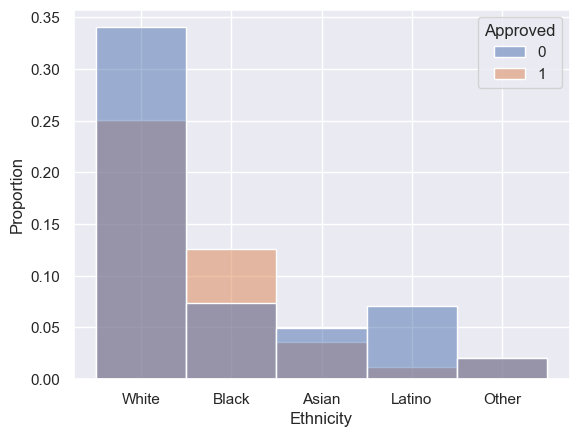

In [65]:
sns.histplot(data=df,x='Ethnicity',hue='Approved',stat='proportion')

#### People working in which industry are getting the most income on average?

In [66]:
print(df.groupby('Industry')['Income'].mean().sort_values(ascending=False).index[0])

Transport


#### lets create colum First_employment, which is shows the age of First employment

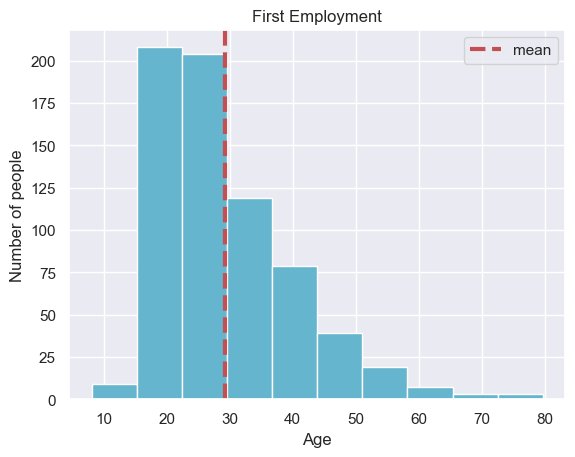

29.291


In [67]:
df['First_employment'] = df['Age'] - df['YearsEmployed']
round(df['First_employment'].mean(),3)
hist = plt.hist(df['First_employment'],color='c')
plt.ylabel('Number of people')
plt.xlabel('Age')
plt.axvline(df['First_employment'].mean(), color='r', linestyle='--', linewidth=3,label='mean')
plt.title('First Employment')
plt.legend()
plt.show()
print(round(df['First_employment'].mean(),3))

As we see mode for first employment is located between 15 and 30

In [68]:
df.isna().sum()

Gender              0
Age                 0
Debt                0
Married             0
BankCustomer        0
Industry            0
InvestmentScore     0
BankRecord          0
Ethnicity           0
YearsEmployed       0
PriorDefault        0
Employed            0
CreditScore         0
DriversLicense      0
Citizen             0
ZipCode             0
Income              0
Approved            0
First_employment    0
dtype: int64

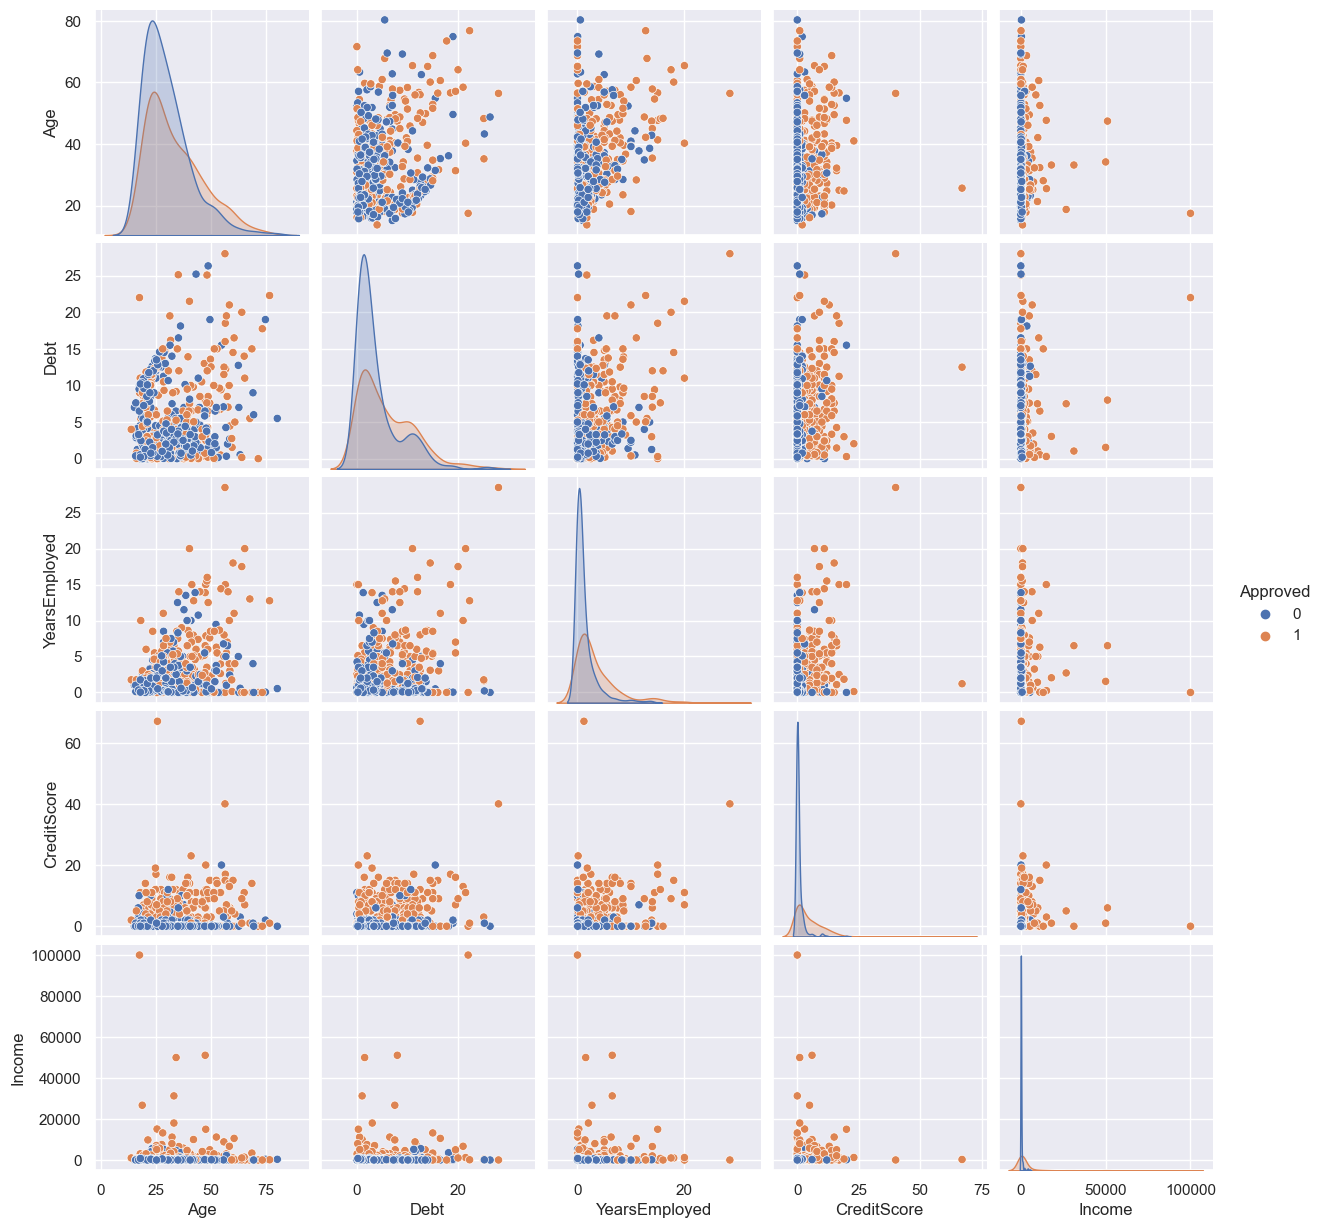

In [69]:
good_columns = ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income','Approved']
sns.pairplot(data=df[good_columns],hue = 'Approved',kind='scatter')

Easy to see that approving most of all based on Income and Credit Score, but for correlation more convinient to look on heatmap

C:\Users\Григорий Михайлович\AppData\Local\Temp\ipykernel_21800\2380579405.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


<Axes: >

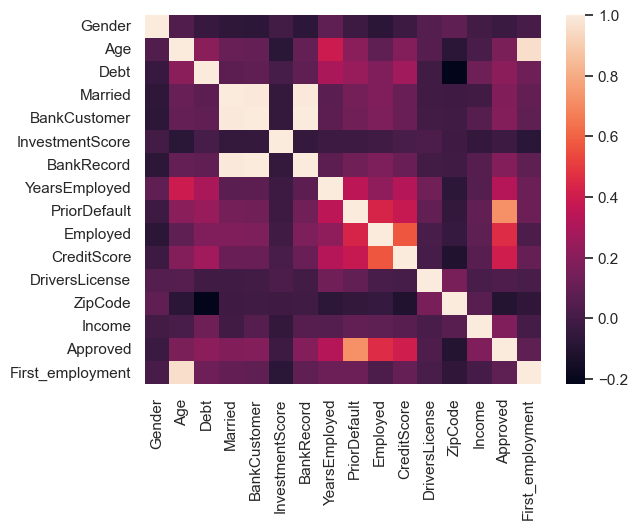

In [70]:
cor = df.corr()
sns.heatmap(cor)

In [74]:
len(df)-(df['Married']==df['BankCustomer']).sum()

2

In [75]:
len(df)-(df['BankRecord']==df['BankCustomer']).sum()

0

No Idea why 99 percents of married column and bank customer column have same classes. About bank record it just a mistake 

In [76]:
pd.crosstab(df['Ethnicity'],df['Industry'])

Industry,CommunicationServices,ConsumerDiscretionary,ConsumerStaples,Education,Energy,Financials,Healthcare,Industrials,InformationTechnology,Materials,Real Estate,Research,Transport,Utilities
Ethnicity,,,,,,,,,,,,,,
Asian,3,32,2,2,14,1,0,1,1,0,2,0,0,1
Black,2,10,2,4,27,12,0,7,17,29,6,0,1,21
Latino,0,0,0,0,0,2,52,0,1,0,0,2,0,0
Other,0,1,0,14,2,0,1,0,0,1,0,7,2,0
White,33,16,50,5,103,36,0,56,22,48,22,1,0,16


In [77]:
df.drop("BankRecord",inplace=True,axis=1)

### Data splitting


In [78]:
y = df.Approved
X = df.drop(columns=['Approved'],axis=1)
sum(y == 1)

307

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,shuffle=True,stratify=y,random_state=314)
sum(y_test==1)

92

## Basic models

Some of the features are not usable in the current form as categorical, so let's make a copy of x with the following columns for the section:

'Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'InvestmentScore', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income'

###### !!! only numerical features without scaling

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

num_columns = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'InvestmentScore', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income']

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

lr = LogisticRegression(max_iter = 5000)
knc = KNeighborsClassifier()
rf = RandomForestClassifier(n_estimators=5)

clf_lst = [lr,knc,rf]
names_lst = ['LogisticRegression','KNeighborsClassifier','Random Forest Classifier']

for clf,name in zip(clf_lst,names_lst):
    clf.fit(X_train_num, y_train)
    y_pred = clf.predict(X_test_num)
    print(name+':',round(f1_score(y_true=y_test,y_pred=y_pred),3))


LogisticRegression: 0.862
KNeighborsClassifier: 0.613
Random Forest Classifier: 0.862


In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
import time

cv = KFold(n_splits=5, shuffle=True,random_state=314)

params_grid_LR = {
    'C': np.logspace(-9, 1, 50),
}

param_grid_KNC = {
    'n_neighbors': range(4,90,4),
    'weights' :['uniform', 'distance'],
    'p' : range(1,3) 
}

param_grid_RFC = {'n_estimators': range(10,200,10),
                  'max_features':['sqrt', 'log2', None],
                  'criterion':['gini', 'entropy'],}

params = [params_grid_LR, param_grid_KNC, param_grid_RFC]

def grid_search_cv(X_train,X_test,y_train,y_test,clf,param,cv):
    gs = GridSearchCV(clf, param_grid=param, cv = cv)
    gs.fit(X_train, y_train)
    score = round(f1_score(y_test,gs.best_estimator_.predict(X_test)),3)
    print(gs.best_params_)
    return score


In [110]:
for clf,name,param in zip(clf_lst,names_lst,params):
    start = time.time()
    score = grid_search_cv(X_train_num,X_test_num,y_train,y_test,clf,param,cv)
    stop = time.time()
    print(name+':',score)
    print('time:',stop-start)
    print('-'*20)

{'C': 0.2329951810515372}
LogisticRegression: 0.859
time: 23.58856177330017
--------------------
{'n_neighbors': 24, 'p': 1, 'weights': 'uniform'}
KNeighborsClassifier: 0.629
time: 3.1133065223693848
--------------------
{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 190}
Random Forest Classifier: 0.862
time: 123.04783701896667
--------------------


## Working with features

In [114]:
df

,Gender,Age,Debt,Married,BankCustomer,Industry,InvestmentScore,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,First_employment
0,1,30.83,0.000,1,1,Industrials,3.65,White,1.25,1,1,1,0,ByBirth,202,0,1,29.58
1,0,58.67,4.460,1,1,Materials,1.94,Black,3.04,1,1,6,0,ByBirth,43,560,1,55.63
2,0,24.50,0.500,1,1,Materials,8.15,Black,1.50,1,0,0,0,ByBirth,280,824,1,23.00
3,1,27.83,1.540,1,1,Industrials,7.99,White,3.75,1,1,5,1,ByBirth,100,3,1,24.08
4,1,20.17,5.625,1,1,Industrials,2.37,White,1.71,1,0,0,0,ByOtherMeans,120,0,1,18.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,Education,7.30,Black,1.25,0,0,0,0,ByBirth,260,0,0,19.83
686,0,22.67,0.750,1,1,Energy,1.79,White,2.00,0,1,2,1,ByBirth,200,394,0,20.67
687,0,25.25,13.500,0,0,Healthcare,7.64,Latino,2.00,0,1,1,1,ByBirth,200,1,0,23.25
688,1,17.92,0.205,1,1,ConsumerStaples,4.92,White,0.04,0,0,0,0,ByBirth,280,750,0,17.88


In [138]:
from sklearn.preprocessing import StandardScaler
scale_columns = ['Age', 'Debt', 'YearsEmployed', 'InvestmentScore', 'CreditScore', 'ZipCode', 'Income']
scaler = StandardScaler()

data_scaled = scaler.fit_transform(df[scale_columns])
df_scaled = pd.DataFrame(data_scaled)
df_scaled = df_scaled.set_axis(scale_columns, axis=1, copy=True)

In [139]:
print(round(max(df_scaled['Income']),3))

19.012


In [140]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
categorical_columns_names = ['Industry', 'Ethnicity','Citizen']
categorical_df = pd.DataFrame(ohe.fit_transform(df[categorical_columns_names]))

In [143]:
names = ohe.get_feature_names_out(categorical_columns_names)
categorical_df = categorical_df.set_axis(names,axis=1,copy=True)

In [145]:
df =pd.concat([categorical_df,df_scaled],axis=1)
print(df.shape[1])

29


In [147]:
df

,Industry_CommunicationServices,Industry_ConsumerDiscretionary,Industry_ConsumerStaples,Industry_Education,Industry_Energy,Industry_Financials,Industry_Healthcare,Industry_Industrials,Industry_InformationTechnology,Industry_Materials,...,Citizen_ByBirth,Citizen_ByOtherMeans,Citizen_Temporary,Age,Debt,YearsEmployed,InvestmentScore,CreditScore,ZipCode,Income
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,-0.057723,-0.956613,-0.291083,-0.410052,-0.288101,0.123399,-0.195413
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,2.291317,-0.060051,0.244190,-1.004199,0.740830,-0.791213,-0.087852
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,-0.591826,-0.856102,-0.216324,1.153494,-0.493887,0.572076,-0.037144
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,-0.310853,-0.647038,0.456505,1.097901,0.535044,-0.463333,-0.194837
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,-0.957176,0.174141,-0.153526,-0.854794,-0.493887,-0.348288,-0.195413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,-0.880394,1.070704,-0.291083,0.858157,-0.493887,0.457031,-0.195413
686,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,-0.746235,-0.805846,-0.066806,-1.056317,-0.082314,0.111894,-0.119736
687,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,-0.528544,1.757198,-0.066806,0.976292,-0.288101,0.111894,-0.195221
688,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,-1.147023,-0.915403,-0.652915,0.031216,-0.493887,0.572076,-0.051358


In [148]:
X = df
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,shuffle=True,stratify=y,random_state=314)

## Models with encoded and scaled features

In [151]:
for clf,name,param in zip(clf_lst,names_lst,params):
    start = time.time()
    score = grid_search_cv(X_train,X_test,y_train,y_test,clf,param,cv)
    stop = time.time()
    print(name+':',score)
    print('time:',stop-start)
    print('-'*20)


{'C': 0.3727593720314938}
LogisticRegression: 0.757
time: 2.127274513244629
--------------------
{'n_neighbors': 12, 'p': 1, 'weights': 'distance'}
KNeighborsClassifier: 0.705
time: 53.812965869903564
--------------------
{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 90}
Random Forest Classifier: 0.757
time: 149.40083146095276
--------------------


In [153]:
from sklearn.metrics import roc_curve, roc_auc_score

def grid_search_cv_proba(X_train,X_test,y_train,y_test,clf,param,cv):
    gs = GridSearchCV(clf, param_grid=param, cv = cv)
    gs.fit(X_train, y_train)
    score = round(f1_score(y_test,gs.best_estimator_.predict(X_test)),3)
    print(gs.best_params_)
    print(score)
    return gs.best_estimator_.predict(X_test),gs.best_estimator_.predict_proba(X_test)

In [154]:
models_lst = [knc,lr]
names = ['KNearestNeighbors','LogisticRegression']
params = [param_grid_KNC,params_grid_LR]
pred = []
proba = []
for name,clf,param in zip(names,models_lst,params):
    y_pred,y_proba = grid_search_cv_proba(X_train,X_test,y_train,y_test,clf,param,cv)
    pred.append(y_pred)
    proba.append(y_proba)

{'n_neighbors': 12, 'p': 1, 'weights': 'distance'}
0.705
{'C': 0.3727593720314938}
0.757


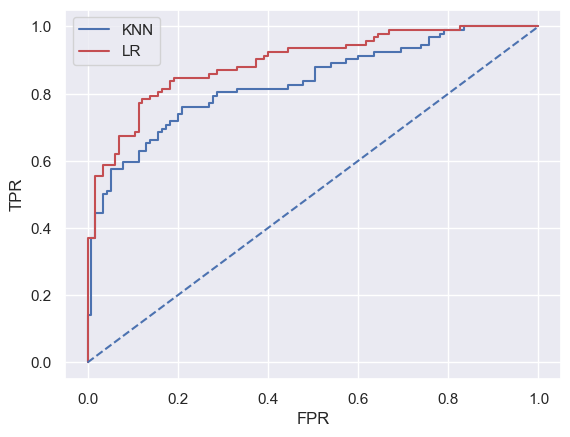

In [176]:
fpr1, tpr1, trshld1 = roc_curve(y_test, proba[0][:,1])
plt.step(fpr1, tpr1, color='b',
         where='post',label='KNN')
fpr2, tpr2, trshld2 = roc_curve(y_test, proba[1][:,1])
plt.step(fpr2, tpr2, color='r',
         where='post',label='LR')
plt.plot([0,1],[0,1],'--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()


In [205]:
def choose_tresh_hold(fpr2,trshld2):
    diag = [i/len(fpr2) for i in range(len(fpr2))]
    trshld_lr = trshld2[(tpr2-diag).argmax()]
    return trshld_lr

In [206]:
trshld_lr = choose_tresh_hold(fpr2,trshld2)

In [209]:
print('F1_score_Logistic_Regression_ROC_AUC_based')
print(f1_score(y_pred,proba[1][:,1]>trshld_lr))

F1_score_Logistic_Regression_ROC_AUC_based
0.9625
